In [1]:
import pyreadr
import numpy as np
import pandas as pd

In [51]:
dictionary = {"fruits": ["apple", "banana", "tomato"]}

In [55]:
dictionary["fruits"][1]

'banana'

In [48]:
dictionary = {"fruits": lambda x: x**2 for x in [1,2,3,4,5]}

In [3]:
dictionary["fruits"]

['apple', 'banana', 'tomato']

In [4]:
dictionary["fruits"]

['apple', 'banana', 'tomato']

In [5]:
rdata = pyreadr.read_r("Prostate.RData")

In [6]:
df = rdata["Prostate"]

In [7]:
df.shape

(97, 9)

In [8]:
df.isnull().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64

In [9]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.430783
1,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519
2,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,7.0,20.0,-0.162519
3,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,6.0,0.0,-0.162519
4,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,6.0,0.0,0.371564


In [10]:
numerical = df.select_dtypes(exclude=["object"])
categorical = df.select_dtypes("object")

In [26]:
import pandas_profiling import profilereport

SyntaxError: invalid syntax (<ipython-input-26-cbb52f7ddd38>, line 1)

In [37]:
df.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df["lweight"]

0     2.769459
1     3.319626
2     2.691243
3     3.282789
4     3.432373
        ...   
92    3.876396
93    3.896909
94    3.396185
95    3.773910
96    3.974998
Name: lweight, Length: 97, dtype: float64

In [13]:
df.lweight.value_counts()

3.719651    2
3.375880    2
3.896909    2
3.473518    2
3.267666    2
           ..
3.498022    1
3.216874    1
3.773910    1
3.392829    1
3.657131    1
Name: lweight, Length: 88, dtype: int64

<AxesSubplot:>

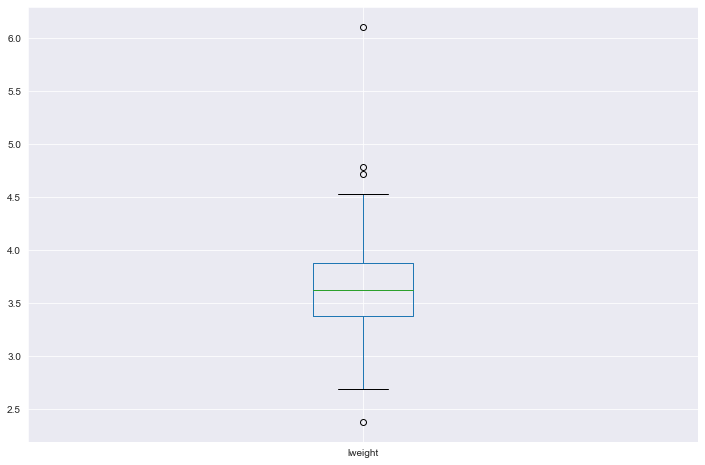

In [56]:
sns.set_style("darkgrid")

df.lweight.plot.box(figsize=(12, 8))

In [15]:
np.quantile(df.lweight, 0.75) + 1.5*(np.quantile(df.lweight, 0.75) - np.quantile(df.lweight, 0.25))

4.63234619423146

In [16]:
df.lweight.clip(0, 4.63234619423146).sort_values(ascending=False).std()

0.43413610464899316

In [17]:
df.lweight.sort_values(ascending=False)

31    6.107580
69    4.780383
88    4.718052
60    4.524502
76    4.433789
        ...   
13    2.998229
56    2.865054
0     2.769459
2     2.691243
37    2.374906
Name: lweight, Length: 97, dtype: float64

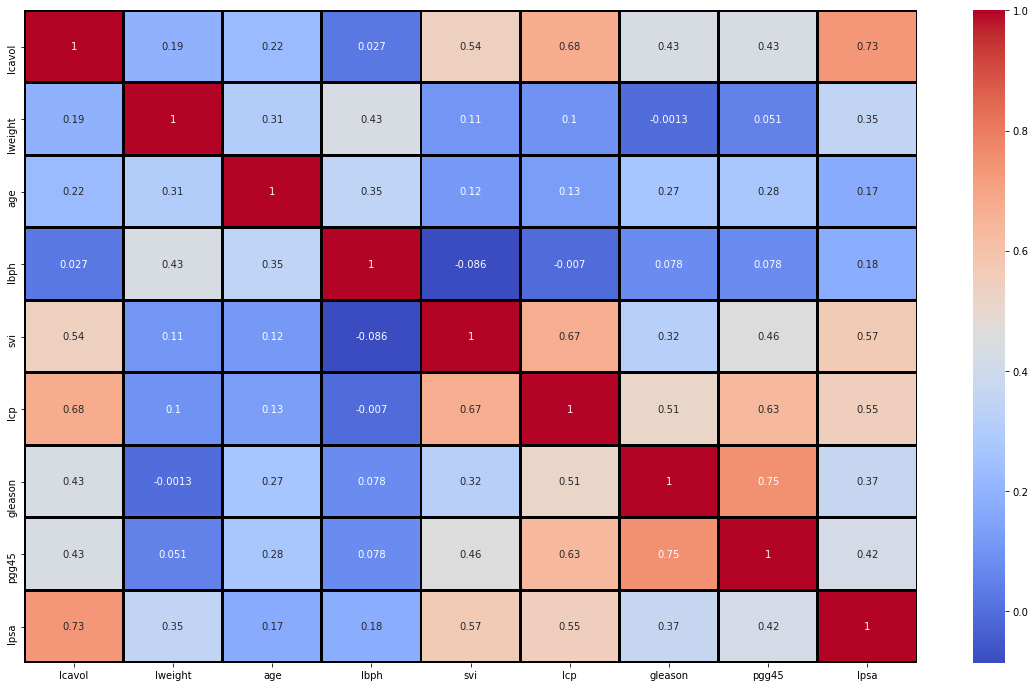

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor="black", cmap="coolwarm")

plt.savefig("corr.png")

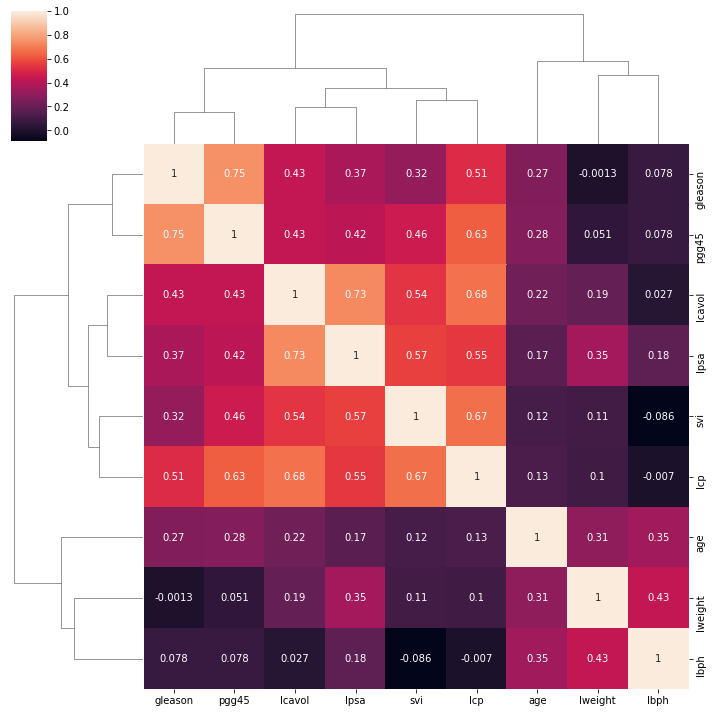

In [68]:
sns.clustermap(df.corr(), annot=True)

In [25]:
# VIF(Variance Inflation Factor)
pd.Series(np.linalg.inv(df.corr()).diagonal(), df.columns).sort_values(ascending=False)

lcp        3.145233
lcavol     3.094686
pgg45      3.009773
lpsa       2.896481
gleason    2.475713
svi        2.175576
lweight    1.474437
lbph       1.427974
age        1.370064
dtype: float64

In [5]:
df.pop("lcp")

0    -1.386294
1    -1.386294
2    -1.386294
3    -1.386294
4    -1.386294
        ...   
92    1.321756
93    2.169054
94    2.463853
95    1.558145
96    2.904165
Name: lcp, Length: 97, dtype: float64

In [6]:
df.isnull().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
gleason    0
pgg45      0
lpsa       0
dtype: int64

In [7]:
y, X = df.pop("lpsa"), df.values

In [38]:
y

0    -0.430783
1    -0.162519
2    -0.162519
3    -0.162519
4     0.371564
        ...   
92    4.385147
93    4.684443
94    5.143124
95    5.477509
96    5.582932
Name: lpsa, Length: 97, dtype: float64

In [52]:
from scipy import stats

stats.kstest(y, 'norm')

KstestResult(statistic=0.7943202036375437, pvalue=4.757661353920279e-66)

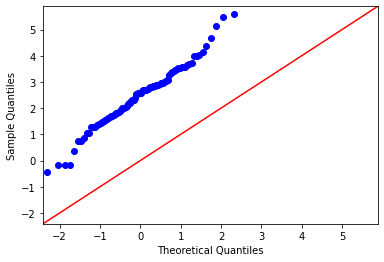

In [40]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(0,1, 1000)

sm.qqplot(y, line='45')
pylab.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

In [13]:
1-(1-r2)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))

0.38115549471523014

In [14]:
1/len(X_test)*sum((y_test-y_pred)**2)

0.5593040983322689

In [43]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, y_train)
params = {"objective": "regression"}
gbm = lgb.train(params, 
             train_data)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 77, number of used features: 6
[LightGBM] [Info] Start training from score 2.509397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [50]:
r2_score(y_test, gbm.predict(X_test))

0.691695914099377

In [49]:
1/len(X_test)*sum((gbm.predict(X_test) - y_test)**2)

0.44118231758014037

In [42]:
class ModelExtractionCallback(object):

    def __init__(self):
        self._model = None

    def __call__(self, env):
        # Keep the reference of _CVBooster 
        self._model = env.model

    def _assert_called_cb(self):
        if self._model is None:
            # Return error when callback has not called
            raise RuntimeError('callback has not called yet')

    @property
    def boosters_proxy(self):
        self._assert_called_cb()
        # Return proxy object to Booster
        return self._model

    @property
    def raw_boosters(self):
        self._assert_called_cb()
        # Rerun the list of Booster
        return self._model.boosters

    @property
    def best_iteration(self):
        self._assert_called_cb()
        # Return boosting round when Early stopped
        return self._model.best_iteration

In [18]:
# LightGBM 用のデータセット表現に直す
lgb_train = lgb.Dataset(X_train, y_train)

# 学習済みモデルを取り出すためのコールバックを用意する
extraction_cb = ModelExtractionCallback()
callbacks = [
    extraction_cb,
]

# データセットを 5-Fold CV で学習する
lgbm_params = {
    "boosting":"dart", #dart(drop out trees) often performs better

}
# NOTE: 一般的には返り値の内容 (交差検証の結果) を確認する
lgb.cv(lgbm_params,
        lgb_train,
        num_boost_round=100,
        early_stopping_rounds=10,
        nfold=10,
        shuffle=True,
        stratified=False,
        #seed=42,
        callbacks=callbacks,
        verbose_eval=100
        )

# コールバックのオブジェクトから学習済みモデルを取り出す
proxy = extraction_cb.boosters_proxy
boosters = extraction_cb.raw_boosters
best_iteration = extraction_cb.best_iteration

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 6
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true

C:\Users\daisu\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [30]:
for booster in boosters:
    y_pred = booster.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(1-(1-r2)*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))

0.31387361049211937
0.4260048473595893
0.3668445143725474
0.2896471392577631
0.43889887869443134
0.32865704680764773
0.4522282120371649
0.4277975003779614
0.4182753766334052
0.4211619685806577
